In [1]:
from scipy.signal import find_peaks, butter, filtfilt

import time
import matplotlib.pyplot as plt
import skimage as ski
from PIL import Image
import numpy as np


In [2]:
# Camera resolution
res = (640, 480)

# To filter the noise in the image we use a 3rd order Butterworth filter
# Wn = 0.02, the cut-off frequency, acceptable values are from 0 to 1
b, a = butter(3, 0.02)

In [3]:
def get_midpoint_peak(Ibw, row):
    
    #converting image to numpy array and taking a row L
    Ibw_array = np.array(Ibw)
    L = Ibw_array[row]
    L.shape
    
    '''#Cropping to Region of Interest
    ROI = np.array(Ibw_array[ROI[0]:ROI[1], ROI[2]:ROI[3]])
    ROI.shape
    plt.figure()
    plt.imshow(ROI)
    ROI.min(), ROI.max()
    L = ROI[row]'''
    
    #smoothening both arrays to filter the noise in the image we use a 3rd order Butterworth filter
    # Wn = 0.02, the cut-off frequency, acceptable values are from 0 to 1
    b, a = butter(3, 0.02)
    L_filt = filtfilt(b, a, L, axis=0)
    L_shifted_filt = np.roll(L_filt, 1)
    L_shifted_filt[0] = L_shifted_filt[1]

    #Displaying L_filt
#     plt.figure()
#     plt.plot(L_filt)
#     plt.show()
    #file_name = 'a/Apr3_peak_' + str(i) + '.jpg'
    #plt.savefig(file_name)
    
    #Displaying L_diff
    L_diff = L_filt - L_shifted_filt
      
    L_diff[0] = 0
    plt.figure()
    plt.plot(L_diff)
    plt.show()
        
    #Calculating the midpoint of the peak
    peak_start = np.argmax(L_diff)
    peak_stop = np.argmin(L_diff)
    peak_mid = (peak_start+peak_stop)/2
    print("Start of the peak is :", peak_start)
    print("End of the peak is :", peak_stop)
    print("Midpoint of the peak is :", peak_mid)
    
    return peak_mid

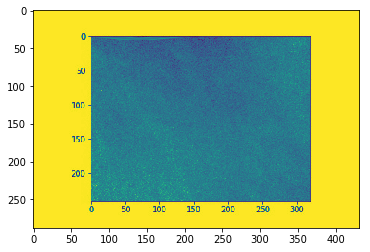

In [4]:
path = "a/Apr4_raw_7.jpg"
row = 200

Ibw = Image.open(path).convert('LA')

I2 = np.array(Ibw)
Ibw.size
I2.shape

plt.figure()
plt.imshow(I2[:, :, 0])
plt.show()

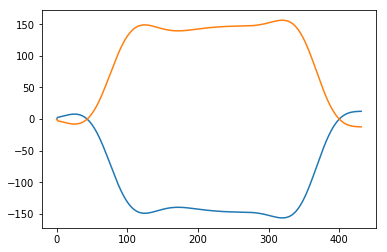

Start of the peak is : 639
End of the peak is : 638
Midpoint of the peak is : 638.5


TypeError: 'numpy.float64' object is not iterable

In [5]:
peak_mid, image_peak = get_midpoint_peak(Ibw, row)
pos_diff = 160 - peak_mid  #2300 was the centre - hard coded
print(pos_diff)
